In [47]:
import pandas as pd 

In [63]:
df = pd.read_csv("/mnt/c/Users/yangg/project/data/comment/Machine Learnia/AFGvDndE2yc.csv", index_col=0)

In [64]:
df.head()

,text,votes
0,C'est un nain de 10 pied 3m pas de 10m,0
1,Cool le t shirt y'en a pour les non puceaux,0
2,4:50 c pour sa que tu fait des musique maintenant,1
3,4:53 et dire qu'il a fait un album 4 ans après 👏💯,1
4,Regardez cette vidéo après la sortie de son al...,0


In [65]:
df = df.dropna(axis = 0)

In [67]:
df.shape

(12636, 2)

In [69]:
import nltk
from nltk.stem.snowball import SnowballStemmer
import unidecode
import re
stemmer = SnowballStemmer("french")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [70]:
def nettoyage(texte):
    tex=[]
    # Construction de la liste de stop words
    import stop_words
    sw_1=stop_words.get_stop_words('fr')
    from nltk.corpus import stopwords
    sw_nltk = set(stopwords.words('french')) 
    sw=list(set(sw_1+list(sw_nltk)))+['vais','vous','je','les','qu','ils','ou','dont','tres',"etait"]
    sw=[unidecode.unidecode(elem) for elem in sw]
    
    texte=unidecode.unidecode(texte.lower())
    
    p="([a-z]+)"
    for elem in re.findall(p,texte):
        if elem in sw or elem==' ':
            continue
        else:
            tex.append(stemmer.stem(elem))
    return ' '.join(tex)


In [82]:
df['text']=df['text'].apply(nettoyage)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'][df['text'].isna()==False])

keys = vectorizer.get_feature_names()
array = X.toarray()

data = pd.DataFrame(data=array, index=range(0, df.shape[0]), columns=keys)
scaler = StandardScaler()
Z = scaler.fit_transform(data)
Z_df = pd.DataFrame(data=Z)

In [164]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(Z_df)
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [165]:
df['label'] = kmeans.labels_

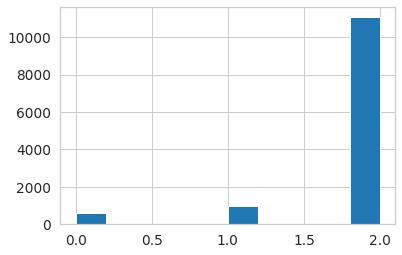

In [166]:
df['label'].hist()

In [129]:
import pickle
pickle.dump(kmeans, open('kmean.pickle', 'wb'))

In [134]:
loaded_model = pickle.load(open('kmean.pickle', 'rb'))

In [138]:
loaded_model.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [137]:
result = loaded_model.transform(Z_df)
print(result.labels_)

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [133]:
data.fit(model)

AttributeError: 'DataFrame' object has no attribute 'fit'

In [76]:
df['text'] = final_tfidf
df['text']

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


/home/gautier/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass input=<module 'stop_words' from '/home/gautier/anaconda3/lib/python3.8/site-packages/stop_words/__init__.py'> as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


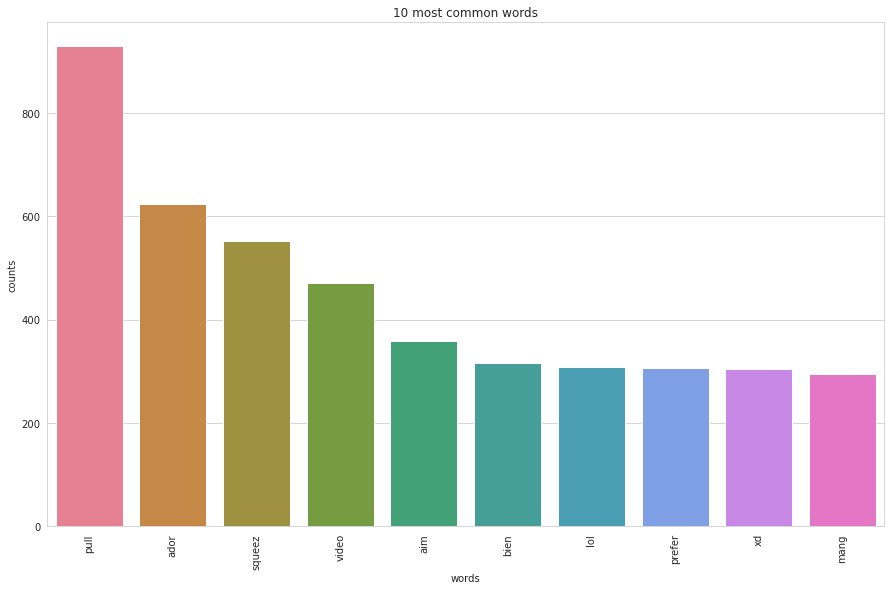

In [46]:
count_vectorizer = CountVectorizer(stop_words)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['text'][df['text'].isna()==False])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [144]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
blob1 = tb(u"c'est décroissant")
blob1.sentiment

(0.0, 0.0)

In [149]:
df2 = pd.read_csv("/mnt/c/Users/yangg/project/data/comment/Machine Learnia/AFGvDndE2yc.csv", index_col=0)

In [150]:
df2 = df2.dropna(axis = 0)

In [151]:
df2['polarity'] = df2['text'].apply(lambda x: tb(x).sentiment)

In [161]:
def which_sentiment(x):
    if x[0] > 0:
        return 'positive'
    elif x[0] < 0:
        return 'negative'
    else:
        return 'neutre'

In [162]:
df2['sentiment'] = df2['polarity'].apply(which_sentiment)

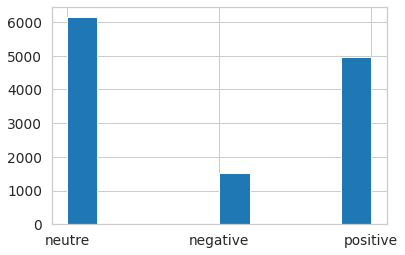

In [163]:
df2['sentiment'].hist()